# **A. Latar Belakang**<br>
Aplikasi transportasi online seperti Maxim telah menjadi bagian dari kehidupan sehari-hari. Ulasan pengguna di Google Play Store menjadi cerminan kualitas layanan yang diberikan. Dengan memahami sentimen pengguna, Maxim dapat mengidentifikasi area yang perlu diperbaiki, meningkatkan kualitas layanan, dan mempertahankan pelanggan.

# **B. Permasalahan**<br>
1. Volume Ulasan Besar: Jumlah ulasan pengguna di Google Play Store sangat besar dan terus bertambah. Membaca dan menganalisis secara manual akan sangat memakan waktu dan rentan terhadap kesalahan manusia.
2. Variasi Ekspresi Sentimen: Pengguna mengekspresikan sentimen mereka dalam berbagai cara, baik secara eksplisit maupun implisit, menggunakan bahasa yang berbeda-beda, sehingga sulit untuk diidentifikasi secara manual.
3. Keputusan Bisnis: Informasi mengenai sentimen pengguna sangat penting untuk pengambilan keputusan bisnis, seperti pengembangan fitur baru, perbaikan layanan, dan alokasi sumber daya.

# **C. Stakeholder**
1. Maxim: Perusahaan penyedia layanan transportasi online yang ingin meningkatkan kualitas layanan dan kepuasan pelanggan.
2. Pengguna Maxim: Mereka yang menggunakan aplikasi Maxim dan memberikan ulasan.
3. Tim Pengembangan Produk: Tim yang bertanggung jawab atas pengembangan dan perbaikan aplikasi Maxim.
4. Tim Pemasaran: Tim yang bertanggung jawab atas strategi pemasaran dan branding Maxim.

# **D. Tujuan**
1. Memahami Sentimen Pengguna: Mengidentifikasi sentimen pengguna (positif, negatif, atau netral) terhadap layanan Maxim berdasarkan ulasan di Google Play Store.
2. Mengidentifikasi Area yang Perlu Perbaikan: Mengidentifikasi aspek-aspek layanan Maxim yang paling sering dikeluhkan atau dipuji oleh pengguna.
3. Mengevaluasi Kinerja Model: Mengevaluasi kinerja model SVM dengan BoW pada data testing baru untuk memastikan akurasi dan relevansinya.
4. Memberikan Rekomendasi: Memberikan rekomendasi kepada tim terkait untuk meningkatkan kualitas layanan berdasarkan hasil analisis sentimen.

# **E. Library dan Data**

In [1]:
# instalasi library google-play-scraper

!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00


In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [3]:
# import library

# library untuk scraping data
from google_play_scraper import Sort, reviews_all

# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library preprocessing text
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# library eksplorasi label
from wordcloud import WordCloud

# library data splitting dan ekstraksi fitur
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# library untuk modeling
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

import warnings

warnings.filterwarnings('ignore')

In [4]:
# Mendefinisikan id aplikasi, negara, dan bahasa

app_id = 'com.taxsee.taxsee'  # ID aplikasi Maxim di Google Play Store
country = 'id'  # kode negara Indonesia
language = 'id'  # kode bahasa Indonesia

In [5]:
# Scraping ulasan

reviews = reviews_all(
    app_id,
    lang=language,
    country=country,
    sort=Sort.NEWEST,  # Mengambil urutan dari yang paling baru
    count=15000,  # Jumlah maksimum ulasan yang ingin diambil
)

In [6]:
# Membuat dataframe dari hasil scraping

maxim_reviews = pd.DataFrame(reviews)
maxim_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9fdeb942-662b-42a1-aafe-de6b9721fd29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,3.16.2,2024-07-29 02:00:12,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:10,3.16.2
1,ad1814d8-bc80-45ba-8d10-b21189af1cf5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baik mobil bersih dan ramah drivernya,5,0,3.16.2,2024-07-29 01:58:56,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:08,3.16.2
2,4125abc7-20d2-45e4-84b2-67b1af7ecc6e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus cepat,5,0,3.16.2,2024-07-29 01:57:34,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:07,3.16.2
3,f9d4621c-7961-4330-b5b4-237d8a36630e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap👍 perjalanannya tiba dengan selamat👍,5,0,3.16.2,2024-07-29 01:55:35,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:07,3.16.2
4,8200bb07-e5b3-47da-8e4b-c1430bfb6d5f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pelayanan baik, cepat",5,0,3.16.2,2024-07-29 01:53:34,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:05,3.16.2


In [7]:
len(maxim_reviews)

388530

In [16]:
# Mengambil 15000 data pertama
maxim_reviews_15000 = maxim_reviews.head(15000)
len(maxim_reviews_15000)

15000

In [17]:
# Menyimpan data ke file CSV
maxim_reviews_15000.to_csv('ulasan_maxim_data_testing.csv', index=False)

# **F. Clean Data**

In [18]:
# load data untuk proses testing

ulasan_maxim = pd.read_csv('ulasan_maxim_data_testing.csv', encoding='utf-8')
ulasan_maxim.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9fdeb942-662b-42a1-aafe-de6b9721fd29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,3.16.2,2024-07-29 02:00:12,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:10,3.16.2
1,ad1814d8-bc80-45ba-8d10-b21189af1cf5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baik mobil bersih dan ramah drivernya,5,0,3.16.2,2024-07-29 01:58:56,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:08,3.16.2
2,4125abc7-20d2-45e4-84b2-67b1af7ecc6e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus cepat,5,0,3.16.2,2024-07-29 01:57:34,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:07,3.16.2
3,f9d4621c-7961-4330-b5b4-237d8a36630e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap👍 perjalanannya tiba dengan selamat👍,5,0,3.16.2,2024-07-29 01:55:35,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:07,3.16.2
4,8200bb07-e5b3-47da-8e4b-c1430bfb6d5f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pelayanan baik, cepat",5,0,3.16.2,2024-07-29 01:53:34,Review kamu berarti banget buat kita! 🎉 Makasi...,2024-07-29 12:01:05,3.16.2


In [19]:
ulasan_maxim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  13369 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          14894 non-null  object
 9   repliedAt             14894 non-null  object
 10  appVersion            13369 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


## **1. Missing Value**

In [20]:
# cek missing value dalam persen

ulasan_maxim.isnull().sum()/len(ulasan_maxim)*100

reviewId                 0.000000
userName                 0.000000
userImage                0.000000
content                  0.000000
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion    10.873333
at                       0.000000
replyContent             0.706667
repliedAt                0.706667
appVersion              10.873333
dtype: float64

In [21]:
# menghapus missing value

ulasan_maxim = ulasan_maxim.dropna()
ulasan_maxim.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

## **2. Duplicate Data**

In [22]:
# cek duplikat data

ulasan_maxim.duplicated().sum()

0

## **3. Data Type**

In [23]:
# cek data type

ulasan_maxim.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
dtype: object

:Output di atas menunjukkan bahwa kolom `at` dan `repliedAt` memiliki tipe data object, sehingga perlu diubah ke datetime.

In [24]:
# ubah at dan repliedAt ke datetime

ulasan_maxim['at'] = pd.to_datetime(ulasan_maxim['at'])
ulasan_maxim['repliedAt'] = pd.to_datetime(ulasan_maxim['repliedAt'])

ulasan_maxim.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
appVersion                      object
dtype: object

## **4. Drop Whitespace**

In [25]:
# menghapus whitespace di awal dan akhir value variabel dengan tipe data object

for col in ulasan_maxim.select_dtypes(include='object'):
    ulasan_maxim[col] = ulasan_maxim[col].str.strip()

# **G. Preprocessing Text**

In [26]:
# Fungsi untuk pra-pemrosesan teks
nltk.download('stopwords') # Download stopwords untuk Bahasa Indonesia
nltk.download('punkt') # Download tokenization untuk Bahasa Indonesia
stop_words = set(stopwords.words('indonesian')) # Inisialisasi stopwords
factory = StemmerFactory() # Inisialisasi stemmer
stemmer = factory.create_stemmer() # Inisialisasi stemmer

def cleaningText(text):
    text = re.sub(r'@\w+', '', text)  # Menghapus mention
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT\s+', '', text)  # Menghapus RT
    text = re.sub(r'http\S+', '', text)  # Menghapus link
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    text = text.replace('\n', ' ')  # Mengganti newline dengan spasi
    text = text.strip()  # Menghapus spasi ekstra pada awal dan akhir teks
    return text

def casefoldingText(text):
    return text.lower()  # Mengonversi teks menjadi huruf kecil

def tokenizingText(text):
    return word_tokenize(text)  # Memecah teks menjadi token

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text] # Changed line

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text


slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal" , "…": ""}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

def toSentence(list_words):
    return ''.join(list_words)  # Menggabungkan token menjadi kalimat

def preprocess_text(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = stemmingText(text)
    text = fix_slangwords(text)
    return toSentence(text)  # Mengembalikan kalimat yang telah melalui pra-premrosesan teks

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
# Menerapkan pra-pemrosesan pada kolom 'content'
ulasan_maxim['processed_content'] = ulasan_maxim['content'].apply(preprocess_text)

# Menampilkan hasil pra-pemrosesan
print(ulasan_maxim['processed_content'])

0                                      ok
1            mobil bersih ramah drivernya
2                             bagus cepat
3                    mantap jalan selamat
4                             layan cepat
                       ...               
14994             driver ramah cantikbaik
14995               mantap drivernya alam
14996    driver ramah bawa kendara nyaman
14997                          lahh pokok
14999                                 oke
Name: processed_content, Length: 13278, dtype: object


# **H. Best Model dan Vectorizer**

In [28]:
# Load Model dan Vectorizer yang sudah di latih

model = joblib.load('/content/best_model.pkl')
vectorizer = joblib.load('/content/best_vectorizer.pkl')

In [29]:
display(model, vectorizer)

SVC(kernel='linear')

CountVectorizer(max_features=5000)

In [30]:
# Ekstraksi fitur menggunakan BoW

X_new = vectorizer.transform(ulasan_maxim['processed_content'])

In [31]:
# Memprediksi sentimen

predictions = model.predict(X_new)

In [32]:
# Mapping label sentimen

sentiment = {'Negatif': 0, 'Netral': 1, 'Positif': 2}

In [33]:
# Output prediksi
ulasan_maxim['predicted_sentiment'] = [sentiment[pred] for pred in predictions]

In [34]:
# Tampilkan hasil prediksi

print(ulasan_maxim[['content', 'predicted_sentiment']])

                                              content  predicted_sentiment
0                                                  ok                    1
1               baik mobil bersih dan ramah drivernya                    2
2                                  sangat bagus cepat                    2
3          mantap👍 perjalanannya tiba dengan selamat👍                    1
4                               pelayanan baik, cepat                    2
...                                               ...                  ...
14994                      driver ramah , cantik,baik                    2
14995                  mantap drivernya berpengalaman                    1
14996  driver ramah dan cara bawa kendaraannya nyaman                    2
14997                       sangat baik lahh pokoknya                    1
14999                                             oke                    1

[13278 rows x 2 columns]


# **I. Visualisasi Hasil Prediksi**

## **1. Distribusi Sentimen Pelanggan**

In [35]:
sentiment_counts = ulasan_maxim['predicted_sentiment'].value_counts()
sentiment_counts

predicted_sentiment
1    7759
2    5375
0     144
Name: count, dtype: int64

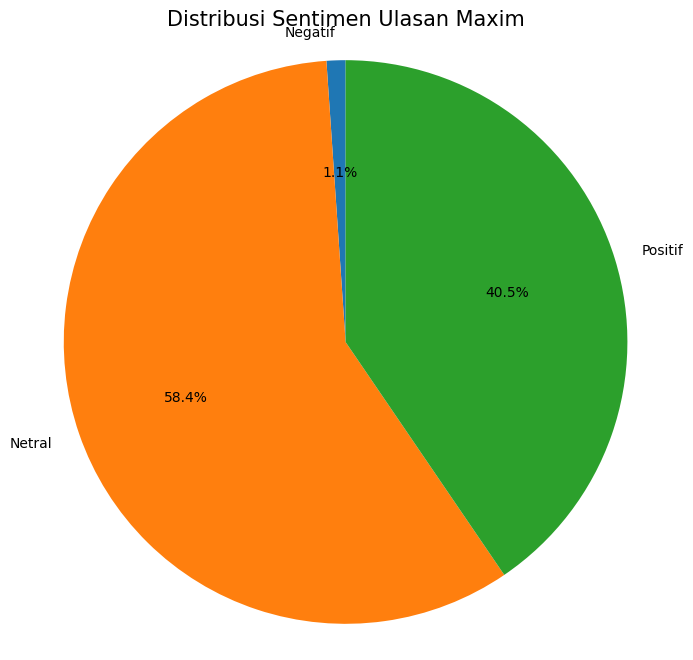

In [37]:
# Distribusi ulasan maxim dengan pie chart

# Data distribusi sentimen
labels = ['Negatif', 'Netral', 'Positif']
sizes = [144, 7759, 5375]

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen Ulasan Maxim', fontsize=15)
plt.axis('equal')

# Menampilkan plot
plt.show()

**Interpretasi Diagram Lingkaran**

1. Berdasarkan diagram lingkaran, dapat disimpulkan bahwa mayoritas ulasan Maxim di Google Play Store bersifat netral (58.4%). Hal ini menunjukkan bahwa sebagian besar pengguna tidak memiliki pengalaman yang sangat positif atau negatif dengan layanan Maxim.
2. Sebanyak 40.5% ulasan bersifat positif, menunjukkan bahwa terdapat cukup banyak pengguna yang puas dengan layanan Maxim. Ini merupakan indikator baik bagi perusahaan.
3. Namun, terdapat juga 1.1% ulasan negatif. Meskipun persentasenya kecil, ulasan-ulasan ini tetap perlu diperhatikan. Ulasan negatif dapat memberikan wawasan berharga mengenai area-area yang perlu diperbaiki Maxim untuk meningkatkan kepuasan pelanggan.
4. Secara keseluruhan, sentimen pengguna terhadap Maxim cenderung positif. Namun, perusahaan perlu terus memantau dan menanggapi ulasan negatif untuk memastikan kepuasan pelanggan dan mempertahankan citra merek yang baik.

## **2. Word Cloud Ulasan Positif**

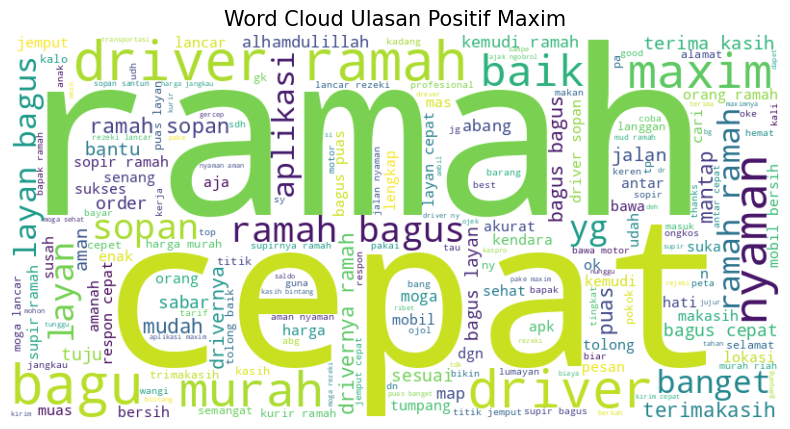

In [38]:
# Filter ulasan positif
positive_reviews = ulasan_maxim[ulasan_maxim['predicted_sentiment'] == 2]['processed_content']

# Gabungkan semua ulasan positif menjadi satu string
all_positive_text = ' '.join(positive_reviews)

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Positif Maxim', fontsize=15)
plt.show()

**Interpretasi Word Cloud Ulasan Positif**

**1. Pelayanan Driver:** Kata-kata seperti "ramah", "baik", "sopan", "sabar", dan "wangi" menunjukkan bahwa pengguna menghargai sikap dan perilaku positif dari para driver Maxim. Ini menunjukkan bahwa Maxim berhasil dalam merekrut dan melatih driver yang memberikan pelayanan yang baik kepada pelanggan.

**2. Kecepatan dan Efisiensi:** Kata-kata seperti "cepat", "lancar", dan "jemput" mengindikasikan bahwa pengguna puas dengan kecepatan layanan Maxim, baik dalam hal pemesanan, penjemputan, maupun waktu tempuh perjalanan.

**3. Kenyamanan dan Kemudahan:** Kata-kata seperti "nyaman" dan "bantu" menunjukkan bahwa pengguna merasa nyaman dan terbantu dengan layanan Maxim. Ini bisa mencakup aspek-aspek seperti kenyamanan kendaraan, kemudahan penggunaan aplikasi, dan bantuan dari customer service.

**4. Harga Terjangkau:** Kata "murah" menunjukkan bahwa pengguna menganggap harga layanan Maxim terjangkau dan kompetitif.

**5. Kepuasan Pelanggan:** Kata-kata seperti "bagus", "puas", "banget", "terimakasih", "sukses", dan "lengkap" menunjukkan tingkat kepuasan yang tinggi dari pengguna terhadap layanan Maxim secara keseluruhan.

**Kesimpulan**: Word cloud ini menunjukkan bahwa Maxim berhasil memberikan pengalaman positif kepada pengguna dalam hal pelayanan driver, kecepatan, kenyamanan, harga, dan kepuasan pelanggan.


## **3. Word Cloud Ulasan Netral**

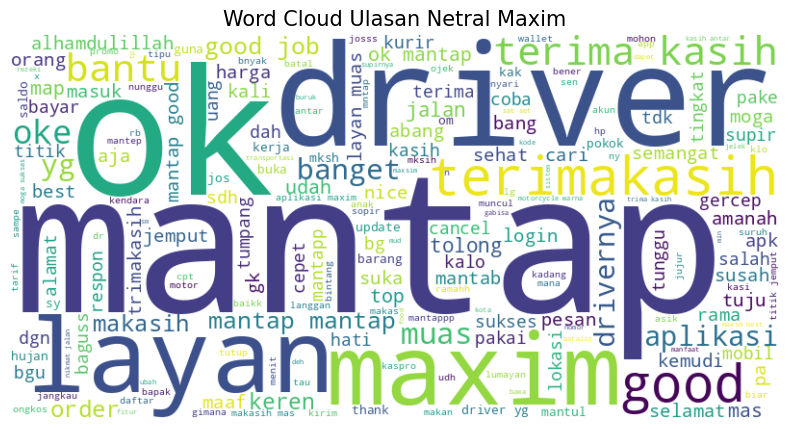

In [39]:
# Filter ulasan netral
neutral_reviews = ulasan_maxim[ulasan_maxim['predicted_sentiment'] == 1]['processed_content']

# Gabungkan semua ulasan netral menjadi satu string
all_neutral_text = ' '.join(neutral_reviews)

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_neutral_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Netral Maxim', fontsize=15)
plt.show()

**Interpretasi Word Cloud Ulasan Netral**

1. Sentimen Campuran: Meskipun diklasifikasikan sebagai netral, kata-kata seperti "mantap", "ok", "good", "keren", "top", "banget", "terimakasih", "sukses" menunjukkan adanya sentimen positif dalam ulasan-ulasan ini. Namun, kata-kata seperti "cancel", "tunggu", "update", "login" mengindikasikan kemungkinan adanya masalah atau ketidaknyamanan yang dialami pengguna.

2. Fokus pada Driver dan Layanan: Kata-kata "driver", "layan", "gercep" (gerak cepat), "amanah", "bantu" menunjukkan bahwa fokus utama ulasan netral tetap pada pengalaman pengguna dengan driver dan layanan yang diberikan.

3. Aspek Teknis dan Fungsionalitas Aplikasi: Kata-kata seperti "aplikasi", "update", "login" menunjukkan bahwa sebagian pengguna mungkin mengalami masalah teknis atau kesulitan dalam menggunakan aplikasi Maxim.

4. Harga dan Pembayaran: Kata-kata "bayar", "harga" mengindikasikan bahwa aspek harga dan metode pembayaran juga menjadi perhatian sebagian pengguna.

5. Harapan untuk Perbaikan: Kata "tingkat" mungkin menunjukkan harapan pengguna untuk peningkatan kualitas layanan Maxim di masa mendatang.

**Kesimpulan**: Ulasan netral memberikan gambaran yang lebih beragam tentang pengalaman pengguna Maxim. Meskipun terdapat sentimen positif, adanya kata-kata yang mengindikasikan masalah teknis, ketidaknyamanan, atau harapan untuk perbaikan menunjukkan bahwa Maxim perlu memperhatikan aspek-aspek tersebut untuk meningkatkan kepuasan pelanggan secara keseluruhan.


## **4. Word Cloud Ulasan Negatif**

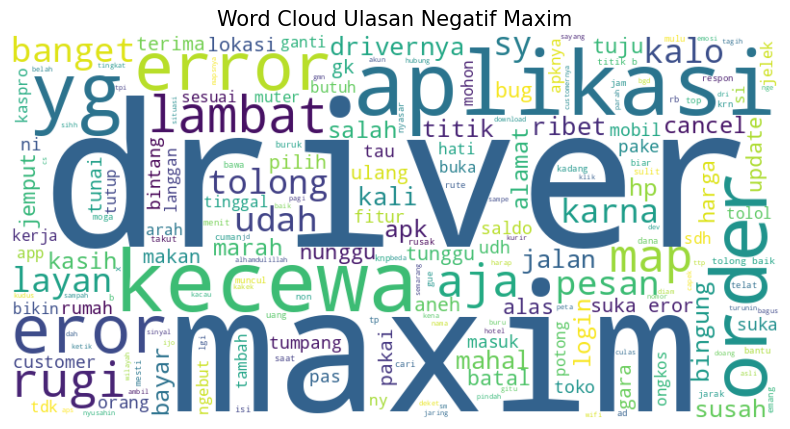

In [40]:
# Filter ulasan negatif
negative_reviews = ulasan_maxim[ulasan_maxim['predicted_sentiment'] == 0]['processed_content']

# Gabungkan semua ulasan negatif menjadi satu string
all_negative_text = ' '.join(negative_reviews)

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Negatif Maxim', fontsize=15)
plt.show()

**Interpretasi Word Cloud Ulasan Negatif**

1. Kekecewaan terhadap Layanan: Kata-kata seperti "kecewa", "rugi", "ribet", "susah", "jelek", "bug" menunjukkan tingkat ketidakpuasan yang tinggi dari pengguna terhadap layanan Maxim. Hal ini perlu menjadi perhatian serius bagi perusahaan.

2. Masalah dengan Driver: Kata "driver" muncul dominan, mengindikasikan banyaknya masalah terkait driver, seperti keterlambatan ("lambat", "nunggu"), pembatalan pesanan ("cancel", "batal"), atau perilaku yang tidak profesional.

3. Kendala Aplikasi: Kata "aplikasi", "error", "update", "bug", "bingung", "fitur" menunjukkan bahwa pengguna mengalami masalah teknis dan kesulitan dalam menggunakan aplikasi Maxim.

4. Harga dan Pembayaran: Kata-kata "mahal", "saldo", "tunai" menunjukkan ketidakpuasan terkait harga atau sistem pembayaran Maxim.

5. Pengalaman Pemesanan yang Buruk: Kata-kata "order", "titik", "cancel", "tunggu" menunjukkan kesulitan dalam proses pemesanan, termasuk masalah dalam menentukan lokasi penjemputan, pembatalan pesanan, dan waktu tunggu yang lama.

6. Permohonan Perbaikan: Kata-kata "tolong", "mohon", "ganti", "update" menunjukkan harapan pengguna agar Maxim segera memperbaiki masalah-masalah yang ada.

**Kesimpulan**: Word cloud ini mengungkapkan sejumlah masalah serius yang perlu ditangani oleh Maxim, termasuk kualitas driver, fungsionalitas aplikasi, harga, dan proses pemesanan. Jika tidak segera diatasi, masalah-masalah ini dapat berdampak negatif pada citra merek dan kepuasan pelanggan Maxim.


# **J. Kesimpulan dan Rekomendasi**

## **1. Kesimpulan**

1. Mayoritas ulasan Maxim di Google Play Store bersifat netral (58.4%), diikuti oleh ulasan positif (40.5%) dan negatif (1.1%).
2. Ulasan positif menyoroti pelayanan driver yang ramah, kecepatan dan efisiensi layanan, kenyamanan, harga terjangkau, dan kepuasan pelanggan secara keseluruhan.
3. Ulasan netral menunjukkan sentimen campuran, dengan fokus pada pengalaman pengguna dengan driver, aspek teknis aplikasi, harga, dan harapan untuk perbaikan.
4. Ulasan negatif mengungkapkan kekecewaan terhadap layanan, masalah dengan driver, kendala aplikasi, harga, pengalaman pemesanan yang buruk, dan permohonan untuk perbaikan.

## **2. Rekomendasi**

1. Pertahankan dan tingkatkan kualitas pelayanan driver dengan memberikan pelatihan tambahan dan insentif.
2. Atasi masalah teknis dan fungsionalitas aplikasi dengan melakukan pembaruan berkala dan pengujian menyeluruh.
3. Tinjau kembali kebijakan harga dan sistem pembayaran untuk memastikan kompetitivitas dan transparansi.
4. Sederhanakan proses pemesanan dan tingkatkan akurasi penentuan lokasi penjemputan.
5. Tanggapi ulasan negatif dengan cepat dan berikan solusi yang memuaskan bagi pelanggan.
6. Terus pantau dan analisis sentimen pengguna untuk mengidentifikasi area-area yang perlu perbaikan dan meningkatkan kepuasan pelanggan secara berkelanjutan.
